---
# POS TAGGING USING RECURRENT NEURAL NETWORKS
---

## Steps to create a POS tagger using RNN
1. Import libraries and dataset
2. Preprocess data and extract features in representable manner
3. Split up training, testing and validation data
4. Create and compile a RNN model using Keras library
5. Training the RNN model on the training set
6. Evaluating the RNN model on the testing set
7. Predicting some sentences for their POS tags using the trained RNN model
---

## 1. IMPORTING LIBRARIES AND DATA-SET

For this project, we will be requiring various functionalities of Numpy, NLTK, Keras(Tensorflow), Scikit learn and Matplotlib


We will use Numpy for:
* Using numpy array
* Using numpy related functionalities such as shape, etc.
* To use other ultilities that require numpy array as input

We will use NTLK for:
* Downloading the POS tagged data from Penn treebank

We will use Scikit learn library for:
* Spliting up training and testing data
* Splitting up training and validation data

We will use Keras library for:
* Tokenise the words and POS tags of data set
* Pad the sentences
* Apply One-hot encoding to the POS tags
* Create, train and test a RNN model

We will use pyplot from Matplotlib for:
* Plot the training history plot of training the RNN model

In [1]:
import numpy as np
import nltk

from nltk.corpus import treebank

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.models import Model
from keras.models import load_model

from matplotlib import pyplot as plt

### Import data set from Penn Trebank POS corpus

In [2]:
# Get tagged sentences from Treebank
# Universal tagset collapses various tagsets into a universal tagset
# such as NN and NNP into Noun

treebank_sentences = treebank.tagged_sents(tagset='universal')

#Check the structure of data received
treebank_sentences[1]

[('Mr.', 'NOUN'),
 ('Vinken', 'NOUN'),
 ('is', 'VERB'),
 ('chairman', 'NOUN'),
 ('of', 'ADP'),
 ('Elsevier', 'NOUN'),
 ('N.V.', 'NOUN'),
 (',', '.'),
 ('the', 'DET'),
 ('Dutch', 'NOUN'),
 ('publishing', 'VERB'),
 ('group', 'NOUN'),
 ('.', '.')]

---
## 2. PRE PROCESSING OF DATA AND FEATURE EXTRACTION

We will process the raw data recived in the format of arrays containing sequences of tuples of (words, POS tag) format to get the final extracted feature that is the list of sets of Posible POS tags for each word in the sequences.

The steps in pre processing and feature extraction are:
* Separating the words and tags from the sentences.
* Converting text representations of tags and words into numerical representation
* Creating tag-sets for each of the words
* Creating a feature matrix which contains corresponding tag-set of each word in the sequence of data set
* Padding the feature set and POS tags assuming the sentence size to be 100.
* One hot encoding the POS tag labels

### Splitting the sentences into words and POS tags

In [3]:
# Separate the Words and Tags from the dataset of sentences

Words = []
Tags = []

word_count = []
tag_count = []

for s in treebank_sentences:
    tmpX = []
    tmpY = []
    for word,tag in s:
        tmpX.append(word.lower())
        tmpY.append(tag.lower())
        
        word_count.append(word.lower())
        tag_count.append(tag.lower())
        
    Words.append(tmpX)
    Tags.append(tmpY)
    
print(Words[0])
print(Tags[0])

['pierre', 'vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', '29', '.']
['noun', 'noun', '.', 'num', 'noun', 'adj', '.', 'verb', 'verb', 'det', 'noun', 'adp', 'det', 'adj', 'noun', 'noun', 'num', '.']


In [4]:
# Check total number of Words and Tags

word_count = len(set(word_count))
tag_count = len(set(tag_count))
print("WORDS: ", word_count)
print("TAGS: ", tag_count)

WORDS:  11387
TAGS:  12


### Encoding words and POS tags from text format to numerical format

In [5]:
# Encode tags into numerical data using Keras tokenizer

#  STEPS:
#  Initialize a new tokenizer
#  Fit the tokeniser on the tags extracted
#  Convert the extracted words into respective sequences using the tokeniser

tag_tok = Tokenizer()
tag_tok.fit_on_texts(Tags)
tagEncoded = tag_tok.texts_to_sequences(Tags)


tEnc = {}

for i in range(len(Tags)):
    for j in range(len(Tags[i])):
        if Tags[i][j] in tEnc:
            pass
        else:
            tEnc[Tags[i][j]] = tagEncoded[i][j]
            
print(tEnc)

tag_arr = [0,0,0,0,0,0,0,0,0,0,0,0]
for (t,i) in tEnc.items():
    tag_arr[i-1] = t
tag_arr

{'noun': 1, '.': 3, 'num': 8, 'adj': 7, 'verb': 2, 'det': 5, 'adp': 4, 'conj': 12, 'x': 6, 'adv': 10, 'prt': 9, 'pron': 11}


['noun',
 'verb',
 '.',
 'adp',
 'det',
 'x',
 'adj',
 'num',
 'prt',
 'adv',
 'pron',
 'conj']

In [6]:
# Encode words into numerical data using Keras tokenizer

word_tok = Tokenizer()
word_tok.fit_on_texts(Words)
wordEncoded = word_tok.texts_to_sequences(Words)

wEnc = {}

for i in range(len(Words)):
    for j in range(len(Words[i])):
        if Words[i][j] in wEnc:
            pass
        else:
            wEnc[Words[i][j]] = wordEncoded[i][j]
    
wEnc

{'pierre': 5601,
 'vinken': 3746,
 ',': 1,
 '61': 2024,
 'years': 86,
 'old': 331,
 'will': 46,
 'join': 2405,
 'the': 2,
 'board': 131,
 'as': 27,
 'a': 6,
 'nonexecutive': 2025,
 'director': 332,
 'nov.': 459,
 '29': 2026,
 '.': 3,
 'mr.': 31,
 'is': 20,
 'chairman': 177,
 'of': 4,
 'elsevier': 5602,
 'n.v.': 2915,
 'dutch': 2916,
 'publishing': 637,
 'group': 147,
 'rudolph': 2917,
 'agnew': 5603,
 '55': 1136,
 'and': 8,
 'former': 602,
 'consolidated': 3747,
 'gold': 1046,
 'fields': 892,
 'plc': 893,
 'was': 34,
 'named': 483,
 '*-1': 9,
 'this': 51,
 'british': 1047,
 'industrial': 435,
 'conglomerate': 2918,
 'form': 638,
 'asbestos': 1048,
 'once': 639,
 'used': 323,
 '*': 11,
 'to': 5,
 'make': 127,
 'kent': 1376,
 'cigarette': 2406,
 'filters': 1549,
 'has': 38,
 'caused': 894,
 'high': 190,
 'percentage': 1049,
 'cancer': 1247,
 'deaths': 1759,
 'among': 232,
 'workers': 514,
 'exposed': 3748,
 'it': 22,
 'more': 57,
 'than': 61,
 '30': 209,
 'ago': 279,
 'researchers': 812,

### Creating corresponding POS tag-sets for each word

In [7]:
# Create tag sets for each word, this will be used to convert each words into its corresponding known POS tags

tag_set = {}

for (sw,st) in zip(Words,Tags):
    for (word,tag) in zip(sw,st):
        if wEnc[word] in tag_set:
            if tEnc[tag] in tag_set[wEnc[word]]:
                pass
            else:
                tag_set[wEnc[word]].add(tEnc[tag])
        else:
            tag_set[wEnc[word]] = {tEnc[tag]}

tag_set

{5601: {1},
 3746: {1},
 1: {3},
 2024: {8},
 86: {1},
 331: {1, 7},
 46: {1, 2},
 2405: {2},
 2: {1, 5, 7, 8},
 131: {1},
 27: {4, 10},
 6: {1, 4, 5, 6, 7},
 2025: {7},
 332: {1},
 459: {1},
 2026: {8},
 3: {3},
 31: {1},
 20: {2},
 177: {1},
 4: {4},
 5602: {1},
 2915: {1},
 2916: {1, 7},
 637: {1, 2},
 147: {1},
 2917: {1},
 5603: {1},
 1136: {8},
 8: {1, 4, 7, 12},
 602: {7},
 3747: {1},
 1046: {1},
 892: {1},
 893: {1},
 34: {2},
 483: {2},
 9: {6},
 51: {5},
 1047: {1, 7},
 435: {1, 7},
 2918: {1},
 638: {1, 2},
 1048: {1},
 639: {4, 10},
 323: {2, 7},
 11: {6},
 5: {4, 7, 9},
 127: {2},
 1376: {1},
 2406: {1},
 1549: {1},
 38: {2},
 894: {2},
 190: {1, 7, 10},
 1049: {1},
 1247: {1},
 1759: {1},
 232: {4},
 514: {1},
 3748: {2},
 22: {11},
 57: {7, 10},
 61: {4},
 209: {8},
 279: {4, 10},
 812: {1},
 283: {2},
 10: {6},
 15: {6},
 5604: {1},
 2027: {1},
 3749: {10},
 5605: {7},
 2407: {2},
 5606: {1},
 28: {4},
 123: {2, 7, 10},
 2028: {2, 7},
 2919: {1},
 2029: {2},
 5607: {1},

### Creating POS tag-set feature matrix for data-set

In [8]:
# We are assuming that a word cannot have more than 5 possible POS tags, it is hyperlogical but does the work

MX = 5

In [9]:
# Constructing the training features

train_val = []
for s in treebank_sentences:
    tmp = []
    for word,t in s:
        if wEnc[word.lower()] in tag_set:
            it = list(tag_set[wEnc[word.lower()]])
            it.sort()
            tmp.append(it)
        else:
            tmp.append([])
#     print(tmp)
#     tmp.sort()
#     print(tmp)
    tmp = pad_sequences(tmp, maxlen = MX, padding = 'post', truncating = 'post')
    train_val.append(tmp)

print(Words[1])
print(train_val[1])

['mr.', 'vinken', 'is', 'chairman', 'of', 'elsevier', 'n.v.', ',', 'the', 'dutch', 'publishing', 'group', '.']
[[1 0 0 0 0]
 [1 0 0 0 0]
 [2 0 0 0 0]
 [1 0 0 0 0]
 [4 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 [3 0 0 0 0]
 [1 5 7 8 0]
 [1 7 0 0 0]
 [1 2 0 0 0]
 [1 0 0 0 0]
 [3 0 0 0 0]]


### Padding the data-set, assuming the sentence size to be 100

In [13]:
# We will assume the size of each sentence is 100, shorter sentences would be padded and longer sentences would be truncated
# This is done to create a uniform data input shape


SENTENCE_SIZE = 100

train_val = pad_sequences(train_val, maxlen = SENTENCE_SIZE, padding = 'post', truncating = 'post')
padded_tag = pad_sequences(tagEncoded, maxlen = SENTENCE_SIZE, padding = 'post', truncating = 'post')

X = train_val


Y = padded_tag

# print(X[0])
print("X: ", X.shape)
print("Y: ", Y.shape)

X:  (3914, 100, 5)
Y:  (3914, 100)


### Applying one-hot encoding to the POS tag labels

In [14]:
# We will be applying one-hot encoding to the POS tags

Y = to_categorical(Y)
Y.shape

(3914, 100, 13)

---
## 3. CREATING, TRAINING AND TESTING THE MODEL

After processing raw data and extracting significant features from it, we will now create a Recurrent Neural Network model and train it to predict POS tags of words in a sentence using the tag-sets of the word.

The steps followed to do this are:
* Spliting the data features and labels into training and testing data
* Splitting the trainind data into training and validation data
* Creating a RNN sequential model using Keras library
* compiling the model
* Training the model using training data
* Evaluating the accuracy of model using testing data set

### Splitting data into training, testing and Validation data

In [10]:
# split entire data into training and testing sets

TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=6)

NameError: name 'X' is not defined

In [ ]:
# split training data into training and validation sets

VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=6)

In [ ]:
print("DATA FOR TRAINING:")
print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)

print("DATA FOR TESTING:")
print("X_test: ", X_test.shape)
print("Y_test: ", Y_test.shape)

print("DATA FOR VALIDATION:")
print("X_validation: ", X_validation.shape)
print("Y_validation: ", Y_validation.shape)

### Creating a Recurrent neural network model

In [24]:
# Create a Sequential model for our RNN

# Add a single layer of 64 RNN cells with input shape corresponding the tag sets of words, 
# activation function of ReLu and allow the RNN layer to return sequences instead of single outputs

# For converting the hidden data to output, create a Dense layer with ouput units  equal to the number of possible POS tags
# For output layer, we will be using softmax activation function, which enables us to predict the probabilities of each word 
# to have each POS tags

model = Sequential()

model.add(SimpleRNN(64,
                    input_shape = X_train.shape[1:],
                    activation='relu',
                    return_sequences = True
))

model.add(Dense(Y.shape[2], activation='softmax'))


### Attaching loss function and optimizer to the model, then complining the model

![image.png](mse.svg)

In [25]:
# Compile the RNN model using the loss function "Mean squared error" and optimizer "Adam"

model.compile(
        loss = 'mean_squared_error',
        optimizer = 'adam',
        metrics=['acc']
)

In [26]:
# Summary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 64)           4480      
                                                                 
 dense (Dense)               (None, 100, 13)           845       
                                                                 
Total params: 5,325
Trainable params: 5,325
Non-trainable params: 0
_________________________________________________________________


### Saving the model in storage, and loading the saved model after first time

In [27]:
path = './model/RNNmodel.keras'

model.save(path)

In [28]:
path = './model/RNNmodel.keras'

model = load_model(path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 64)           4480      
                                                                 
 dense (Dense)               (None, 100, 13)           845       
                                                                 
Total params: 5,325
Trainable params: 5,325
Non-trainable params: 0
_________________________________________________________________


### Training the model on training data set

In [29]:
# Train the RNN model created using the training data
#    No. of iterations: 10
#    No. of dataset evaluated per step: 10

train = model.fit(X_train, Y_train, batch_size = 10, epochs = 10, validation_data=(X_validation, Y_validation))

Epoch 1/10
283/283 [==============================] - 6s 17ms/step - loss: 0.0208 - acc: 0.8326 - val_loss: 0.0125 - val_acc: 0.8769
Epoch 2/10
283/283 [==============================] - 4s 15ms/step - loss: 0.0114 - acc: 0.8914 - val_loss: 0.0102 - val_acc: 0.9081
Epoch 3/10
283/283 [==============================] - 6s 21ms/step - loss: 0.0096 - acc: 0.9154 - val_loss: 0.0088 - val_acc: 0.9270
Epoch 4/10
283/283 [==============================] - 8s 27ms/step - loss: 0.0081 - acc: 0.9352 - val_loss: 0.0073 - val_acc: 0.9432
Epoch 5/10
283/283 [==============================] - 6s 22ms/step - loss: 0.0069 - acc: 0.9464 - val_loss: 0.0065 - val_acc: 0.9502
Epoch 6/10
283/283 [==============================] - 8s 27ms/step - loss: 0.0059 - acc: 0.9529 - val_loss: 0.0059 - val_acc: 0.9498
Epoch 7/10
283/283 [==============================] - 6s 21ms/step - loss: 0.0054 - acc: 0.9563 - val_loss: 0.0051 - val_acc: 0.9579
Epoch 8/10
283/283 [==============================] - 6s 22ms/step - 

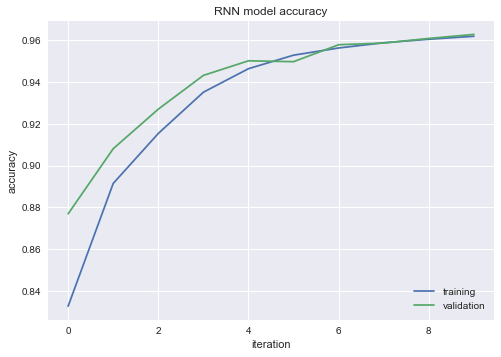

In [30]:
# visualise training history

plt.style.use("seaborn")
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.legend(['training', 'validation'], loc="lower right")
plt.show()

In [31]:
# Evaluate the trained RNN model on the testing data

loss, acc = model.evaluate(X_test, Y_test, verbose = 1)
print("Mean Square error Loss: ", loss)
print("Accurancy: ", acc*100, "%")

19/19 [==============================] - 0s 10ms/step - loss: 0.0044 - acc: 0.9627
Mean Square error Loss:  0.004405101295560598
Accurancy:  96.2670087814331 %


Confusion matrix: 
-------------------


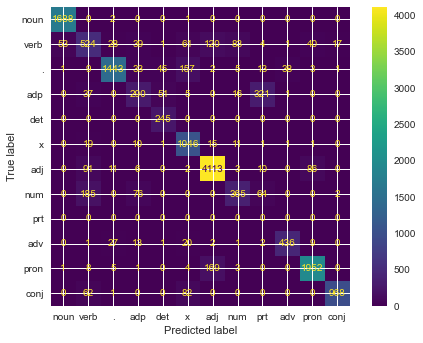

In [32]:
Y_pred = model.predict(X_test)
Yp = np.argmax(Y_pred, axis = -1)
Yt = np.argmax(Y_test, axis = -1)

# print(Yp.shape, Yt.shape)

Yp = tag_tok.sequences_to_texts(Yp)
Yp = [i.split(" ") for i in Yp]
Yp = list(np.concatenate(Yp).flat)
# print(Yp)


Yt = tag_tok.sequences_to_texts(Yt)
Yt = [i.split(" ") for i in Yt]
Yt = list(np.concatenate(Yt).flat)
# print(Yt)


# print(np.array(Yp).shape)
# print(np.array(Yt).shape)



cm = confusion_matrix(Yp, Yt)
cm_plt = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tag_arr)

cm_plt.plot()
print("Confusion matrix: ")
print("-------------------")
plt.show()

---
## 4. PREDICTION USING THE TRAINED MODEL

Here, we are trying to predict a totally unknown sentence for the POS tags of each of its words.
We have taken two random sentences and used the RNN model to predict the POS tags.

We can clearly see that our trained model can guess the correct POS tags with a great accuracy, 
except one error that is:
* Predicting 'inside' as a Noun, while 'inside' here is an adposition

In [33]:
# Create array of sentences as input

inp = [
    ['John', 'is', 'a', 'good', 'person','.'],
    ['The','company','bought','the','pool','inside','that','building','.'],
]

In [34]:
# Convert the raw data into processed feature array

pred_val = []

for s in inp:
    tmp = []
    for word in s:
        word = word.lower()
        if wEnc[word] in tag_set:
            it = list(tag_set[wEnc[word]])
            it.sort()
            tmp.append(it)
        else:
            tmp.append([])
    tmp = pad_sequences(tmp, maxlen = MX, padding = 'post', truncating = 'post')
    pred_val.append(tmp)

print(pred_val)

[array([[1, 0, 0, 0, 0],
       [2, 0, 0, 0, 0],
       [1, 4, 5, 6, 7],
       [1, 7, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [3, 0, 0, 0, 0]]), array([[ 1,  5,  7,  8,  0],
       [ 1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 1,  5,  7,  8,  0],
       [ 1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0],
       [ 4,  5, 10,  0,  0],
       [ 1,  2,  0,  0,  0],
       [ 3,  0,  0,  0,  0]])]


In [35]:
# Pad the sentences with the sentence size of 100, because we assume so in our training

pred_val = pad_sequences(pred_val, maxlen = SENTENCE_SIZE, padding = 'post', truncating = 'post')
np.array(pred_val).shape

(2, 100, 5)

In [36]:
# Predict the POS tags using our RNN model

pred_labels = model.predict(pred_val)

In [54]:
pred_labels

array([[[4.44137637e-04, 8.53693902e-01, 2.58715209e-02, ...,
         5.27694961e-03, 9.69031767e-04, 6.22120919e-04],
        [4.11356996e-06, 1.71295658e-01, 5.89565814e-01, ...,
         9.10093149e-06, 1.21001307e-07, 1.85185254e-05],
        [9.95194227e-07, 8.18264743e-05, 1.94346096e-04, ...,
         4.77344383e-06, 2.71043348e-07, 7.78396643e-05],
        ...,
        [9.99997973e-01, 2.00068530e-06, 2.79389769e-14, ...,
         9.45718751e-29, 1.24322664e-23, 7.29490556e-16],
        [9.99997973e-01, 1.98707426e-06, 2.75109644e-14, ...,
         9.17342641e-29, 1.21408462e-23, 7.17611236e-16],
        [9.99997973e-01, 1.97405643e-06, 2.71049120e-14, ...,
         8.90830049e-29, 1.18665727e-23, 7.06356339e-16]],

       [[2.33853893e-06, 2.17030896e-03, 1.19064229e-04, ...,
         9.46800457e-04, 3.80425845e-05, 6.70445058e-03],
        [3.12198681e-04, 9.91784692e-01, 7.12995138e-03, ...,
         4.20357586e-12, 1.23732509e-11, 3.86931390e-07],
        [2.90341654e-06, 

In [37]:
#Convert the one-hot encoded output into integer-encoded POS tags

out = []
for o in pred_labels:
    out.append(np.argmax(o, axis=-1))
    
out

[array([1, 2, 5, 7, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([5, 1, 2, 5, 1, 1, 4, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)]

In [38]:
# Convert numerical encoded POS tags into POS tag words

res = tag_tok.sequences_to_texts(out)

In [39]:
for (i,o) in zip(inp,res):
    print("input: ", i)
    print("Prediction: ", o.split(" "))
    print("\n")

input:  ['John', 'is', 'a', 'good', 'person', '.']
Prediction:  ['noun', 'verb', 'det', 'adj', 'noun', '.']


input:  ['The', 'company', 'bought', 'the', 'pool', 'inside', 'that', 'building', '.']
Prediction:  ['det', 'noun', 'verb', 'det', 'noun', 'noun', 'adp', 'verb', '.']




# END OF PROJECT
---
---